In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from isingm import *

In [2]:
def mc_ising(steps:int, n,j,T,a_in, skipsteps = 1, frames = 100, annealing = False):

    if annealing and T < 2.269:
        initialTemp = 4
        finalTemp = T

    def TempFuncExp(step):
        return initialTemp * (finalTemp / initialTemp)**(step/steps)
    
    def TempFuncInverse(step):
        alpha = (initialTemp - finalTemp) / (finalTemp * (steps - 1))
        return initialTemp / (1 + alpha * step)
    
    stepSaveFrame = steps/frames

    a = a_in.copy()

    energies = np.empty(steps//skipsteps)
    magnetizations = np.empty(steps//skipsteps)

    E = energy(a,j)
    M = magnetization(a)

    #data = []


    if annealing and T < 2.269:
        for i in range(steps):
            if i % skipsteps == 0:
                energies[i//skipsteps] = E
                magnetizations[i//skipsteps] = M


            
            # if i % stepSaveFrame == 0:
            #     data.append(a.copy())

            x = np.random.randint(0,n)
            y = np.random.randint(0,n)

            b = a.copy()
            b[x,y] *= -1
            
            
            spinChange = b[x,y] - a[x,y]
            dE = -j*(spinChange)*(a[x,(y+1)%n] + a[(x+1)%n,y] + a[x,y-1] + a[x-1,y])
            dM = spinChange

            if dE <= 0 or np.random.rand() <= np.exp(-dE * (TempFuncExp(i)**(-1))):
                E += dE
                M += dM
                a = b.copy()

        return np.arange(steps//skipsteps), energies, magnetizations#, np.array(data)
    else:
        probs = probabilities(j,T)
        for i in range(steps):
            if i % skipsteps == 0:
                energies[i//skipsteps] = E
                magnetizations[i//skipsteps] = M


            
            # if i % stepSaveFrame == 0:
            #     data.append(a.copy())

            x = np.random.randint(0,n)
            y = np.random.randint(0,n)

            b = a.copy()
            b[x,y] *= -1
            
            
            spinChange = b[x,y] - a[x,y]
            dE = -j*(spinChange)*(a[x,(y+1)%n] + a[(x+1)%n,y] + a[x,y-1] + a[x-1,y])
            dM = spinChange

            if dE <= 0 or np.random.rand() <= probs[dE]:
                E += dE
                M += dM
                a = b.copy()

        return np.arange(steps//skipsteps), energies, magnetizations#, np.array(data)

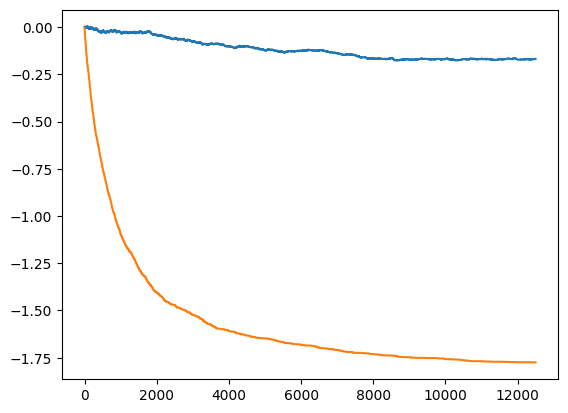

0.0004436969757080078

In [ ]:
from time import time

n = 64


a_in = randominitial(n)

steps = 1e5
T = 0.1

step, u, m = mc_ising(int(steps), n, 1, T, a_in, skipsteps= 8, frames = 100, annealing=False)
plt.plot(step, m/n**2, label = "magnetization per Particle")
plt.plot(step, u/n**2, label = "Energy per Particle")
plt.show()

#animate(a, 'standrad.mp4', 20)

Running with system size 20

In [81]:
temperatures = [.1,.5, 1.0, 1.5, 2.0, 2.1,2.26,2.6]
magnetizationAverage = np.empty_like(temperatures)
magnetizationError = np.empty_like(temperatures)

steps = 5e6

In [82]:

i = 0

for temperature in temperatures:

    print(f"runnig with temperature = {temperature}...")

    n = 20
    a_in = all_up(n)

    step, u, mag = mc_ising(int(steps), n, 1, temperature, a_in, skipsteps= 100, frames = 1, annealing=True)

    magnetizationAverage[i] = (np.mean(mag[-1000:]))
    magnetizationError[i] = (np.std(mag[-1000:], ddof= 1))

    i += 1

    
magnetizationAverage_perParticle = np.asarray(magnetizationAverage)/(n*n)
magnetizationError_perParticle = np.asarray(magnetizationError)/(n*n)

np.savetxt("magnetizations_vs_temperatures_20size", np.array([temperatures, magnetizationAverage_perParticle, magnetizationError_perParticle]).transpose(), header="Temperature, magnetization, Error")

runnig with temperature = 0.1...
runnig with temperature = 0.5...
runnig with temperature = 1.0...
runnig with temperature = 1.5...
runnig with temperature = 2.0...
runnig with temperature = 2.1...
runnig with temperature = 2.26...
runnig with temperature = 2.6...


/tmp/ipykernel_4006/1931414942.py:8: RuntimeWarning: overflow encountered in sinh
  result[below_critical] = (1- (np.sinh(2/(Temperature[below_critical]+1e-12)))**(-4))**(1/8)


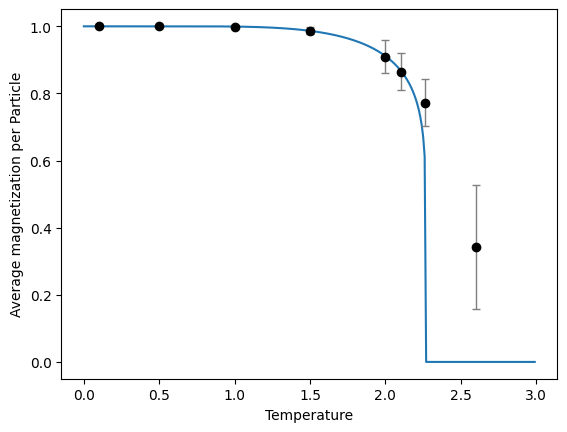

In [83]:
x, y, yerr = np.loadtxt("magnetizations_vs_temperatures_20size", unpack=True)

Temperature_analytical = np.arange(0,3,0.01)

plt.plot(Temperature_analytical, analytical_magnetization(Temperature_analytical))
plt.errorbar(
    x, np.abs(y),
    yerr=yerr,
    fmt='o',           # circle markers
    ecolor='tab:gray', # errorbar color
    elinewidth=1,      # errorbar line width
    capsize=3,         # caps on the errorbars
    label = f"data", 
    color = 'black',
    )
plt.xlabel("Temperature")
plt.ylabel("Average magnetization per Particle")
plt.show()

Runnign with system size 40

In [84]:

i = 0

for temperature in temperatures:

    print(f"runnig with temperature {temperature}")

    n = 40
    a_in = all_up(n)

    step, u, mag = mc_ising(int(steps), n, 1, temperature, a_in, skipsteps= 100, frames = 1, annealing=True)

    magnetizationAverage[i] = (np.mean(mag[-1000:]))
    magnetizationError[i] = (np.std(mag[-1000:], ddof= 1))

    i += 1

runnig with temperature 0.1
runnig with temperature 0.5
runnig with temperature 1.0
runnig with temperature 1.5
runnig with temperature 2.0
runnig with temperature 2.1
runnig with temperature 2.26
runnig with temperature 2.6


In [85]:
magnetizationAverage_perParticle = np.asarray(magnetizationAverage)/(n*n)
magnetizationError_perParticle = np.asarray(magnetizationError)
np.savetxt("magnetizations_vs_temperatures", np.array([temperatures, magnetizationAverage_perParticle, magnetizationError_perParticle]).transpose(), header="Temperature, magnetization, Error")

In [86]:
def analytical_magnetization(Temperature):
    Temperature = np.asarray(Temperature)

    result = np.zeros_like(Temperature)

    below_critical = Temperature <= 2.2691853142

    result[below_critical] = (1- (np.sinh(2/(Temperature[below_critical]+1e-12)))**(-4))**(1/8)

    return result

/tmp/ipykernel_4006/1931414942.py:8: RuntimeWarning: overflow encountered in sinh
  result[below_critical] = (1- (np.sinh(2/(Temperature[below_critical]+1e-12)))**(-4))**(1/8)


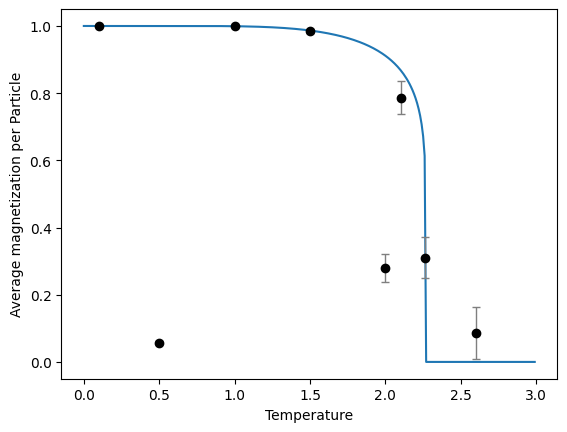

In [90]:
Temperature_analytical = np.arange(0,3,0.01)

x, y, yerr = np.loadtxt("magnetizations_vs_temperatures", unpack=True)

plt.plot(Temperature_analytical, analytical_magnetization(Temperature_analytical))
plt.errorbar(
    x, np.abs(y),
    yerr=yerr/(n*n),
    fmt='o',           # circle markers
    ecolor='tab:gray', # errorbar color
    elinewidth=1,      # errorbar line width
    capsize=3,         # caps on the errorbars
    label = f"data", 
    color = 'black',
    )
plt.xlabel("Temperature")
plt.ylabel("Average magnetization per Particle")
plt.show()